# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import urllib.request as urllib
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
api_key="479ed2a27e45ad6959f08f9b294757f7"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
settings={"units":"metric","appid":api_key}

weather_data=[]
weather=[]
x=0
#weather_data=[ow.getcurrent(city,**settings) for city in cities]
for city in cities:    
    try:
        weather_data.append(owm.get_current(city,**settings))
        print(f"Processing Record {x}|{city}")
    except urllib.HTTPError as err:
       if err.code == 404:
        print("City not found. Skipping....")
    x+=1    
        
      

Processing Record 0|saint-philippe
City not found. Skipping....
Processing Record 2|henties bay
Processing Record 3|butaritari
Processing Record 4|ayr
Processing Record 5|dikson
Processing Record 6|georgetown
Processing Record 7|sheregesh
Processing Record 8|port alfred
Processing Record 9|barrow
Processing Record 10|novyy urengoy
Processing Record 11|saskylakh
Processing Record 12|arraial do cabo
Processing Record 13|luderitz
Processing Record 14|busselton
Processing Record 15|severo-kurilsk
Processing Record 16|albany
Processing Record 17|lavrentiya
Processing Record 18|kapaa
Processing Record 19|hobart
City not found. Skipping....
Processing Record 21|fairbanks
Processing Record 22|khatanga
Processing Record 23|yellowknife
Processing Record 24|chuy
Processing Record 25|kruisfontein
City not found. Skipping....
Processing Record 27|qaanaaq
Processing Record 28|la ronge
Processing Record 29|esperance
Processing Record 30|hilo
Processing Record 31|hermanus
Processing Record 32|ribeira 

City not found. Skipping....
Processing Record 269|kurmanayevka
Processing Record 270|zaida
Processing Record 271|cidreira
Processing Record 272|camacupa
Processing Record 273|roebourne
Processing Record 274|alofi
Processing Record 275|bambanglipuro
City not found. Skipping....
Processing Record 277|pangody
Processing Record 278|batagay-alyta
Processing Record 279|boleslawiec
Processing Record 280|aberdeen
Processing Record 281|yulara
Processing Record 282|turtas
Processing Record 283|salalah
Processing Record 284|codrington
City not found. Skipping....
Processing Record 286|tselinnoye
Processing Record 287|sambava
City not found. Skipping....
Processing Record 289|souillac
Processing Record 290|moctezuma
Processing Record 291|bonthe
Processing Record 292|waingapu
Processing Record 293|portree
Processing Record 294|bosaso
Processing Record 295|bambous virieux
Processing Record 296|yartsevo
Processing Record 297|mwinilunga
Processing Record 298|baykit
City not found. Skipping....
City n

Processing Record 532|coxim
Processing Record 533|tiangua
Processing Record 534|lata
Processing Record 535|tshikapa
Processing Record 536|san jose el alto
Processing Record 537|mae sai
Processing Record 538|yumen
Processing Record 539|fort nelson
Processing Record 540|selma
Processing Record 541|kisesa
Processing Record 542|otane
Processing Record 543|dossor
Processing Record 544|kabanjahe
Processing Record 545|tanout
Processing Record 546|bichura
Processing Record 547|hope
Processing Record 548|seoul
City not found. Skipping....
Processing Record 550|puerto penasco
Processing Record 551|mattru
Processing Record 552|doha
Processing Record 553|kamra
City not found. Skipping....
City not found. Skipping....
Processing Record 556|lady frere
Processing Record 557|paka
Processing Record 558|eskisehir
Processing Record 559|plover
Processing Record 560|bocas del toro
Processing Record 561|hecelchakan
Processing Record 562|pryamitsyno
Processing Record 563|dongsheng
Processing Record 564|chupa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
summary=["name","coord.lon","coord.lat","main.temp","main.humidity","clouds.all","wind.speed"]
data=[response(*summary) for response in weather_data]
weather_data_pd=pd.DataFrame(data)
columns=["City","Lon","Lat","Temperature","Humidity","Cloudiness","Wind Speed"]
weather_data_pd.columns=columns

In [78]:
weather_data_pd.to_csv("weather.csv", index=False, header=True)  
weather_data_pd.head()

,City,Lon,Lat,Temperature,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,-73.48,45.36,14.83,67,20,4.10
1,Henties Bay,14.28,-22.12,16.15,72,8,5.41
2,Butaritari,172.79,3.07,28.45,79,89,6.19
3,Ayr,-4.63,55.46,11.17,71,20,5.10
4,Dikson,80.55,73.51,-3.55,90,81,2.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

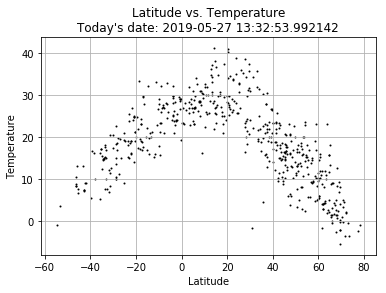

In [80]:
for i, row in weather_data_pd.iterrows():
    plt.scatter(row['Lat'],row['Temperature'], marker="o", facecolors="lightblue", edgecolors="black", s=1, alpha=1,label="")


date=datetime.datetime.today()
plt.title(f"Latitude vs. Temperature\nToday's date: {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()


plt.savefig("Latitude vs. Temperature.jpeg")

#### Latitude vs. Humidity Plot

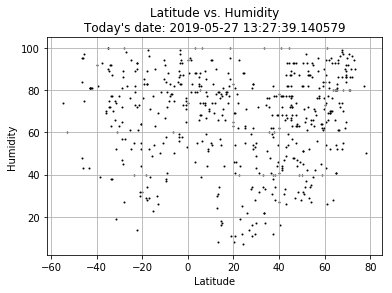

In [75]:
for i, row in weather_data_pd.iterrows():
    plt.scatter(row['Lat'],row['Humidity'], marker="o", facecolors="lightblue", edgecolors="black", s=1, alpha=1,label="")


date=datetime.datetime.today()
plt.title(f"Latitude vs. Humidity\nToday's date: {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()


plt.savefig("Latitude vs. Humidity.jpeg")

#### Latitude vs. Cloudiness Plot

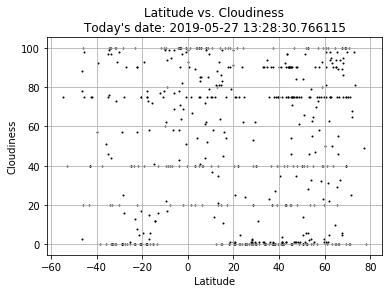

In [76]:
for i, row in weather_data_pd.iterrows():
    plt.scatter(row['Lat'],row['Cloudiness'], marker="o", facecolors="lightblue", edgecolors="black", s=1, alpha=1,label="")


date=datetime.datetime.today()
plt.title(f"Latitude vs. Cloudiness\nToday's date: {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()


plt.savefig("Latitude vs. Cloudiness.jpeg")

#### Latitude vs. Wind Speed Plot

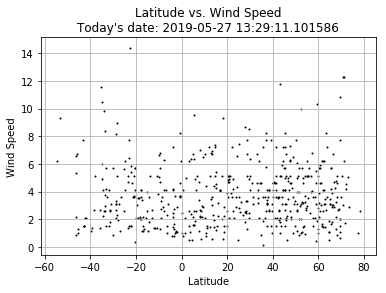

In [77]:
for i, row in weather_data_pd.iterrows():
    plt.scatter(row['Lat'],row['Wind Speed'], marker="o", facecolors="lightblue", edgecolors="black", s=1, alpha=1,label="")


date=datetime.datetime.today()
plt.title(f"Latitude vs. Wind Speed\nToday's date: {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()


plt.savefig("Latitude vs. Wind Speed.jpeg")